<a href="https://colab.research.google.com/github/Kalpesh1969/ML-Project/blob/main/Sample_ML_Classification_Mobile_Price_Range_Submission_Kalpesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Kalpesh Parikh


# **Project Summary -**

We have given a dataset of Mobile phone which contains 21 features and 2000 records. Various features like RAM, Batter power, Bluetooth, 3G/4G etc..and a price range column. Price range column has four different types of price category. 0-Low price, 1-Medium price, 2-High price, and 4-Premium price.

Our goal is to find correlation of various features which can affect the price. Some featues may have direct impact, some have medium to low impact in price.

We need to perform various visualtion and analysis of featues vs price range and find out the best fit classification machine learning model for prediction of mobile phone price range.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Want to predict the price range of mobile phone based on most correlated features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()
null_value = df.isnull()
null_value

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Missing values count and order then in descending order
miss_values = df.isnull().sum().sort_values(ascending=False)
miss_values

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


<Axes: >

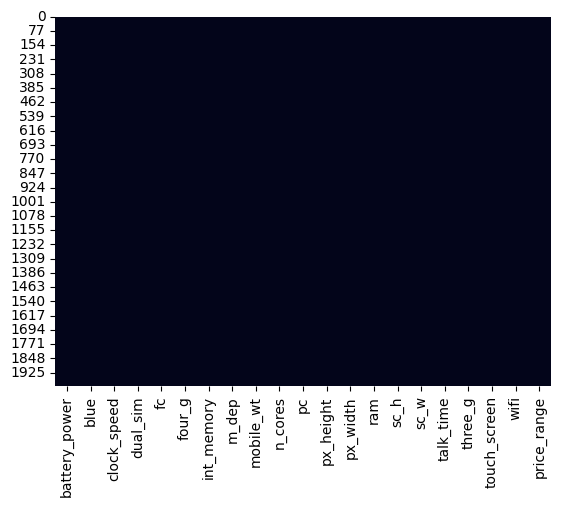

In [10]:
# Visualizing the missing values
# There is neither duplicate nor null value which can be visualized thru heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This data set contains 2000 records and 21 columns. All columns are integer data type except clock speed and mobile depth which is float. Here we are not making any changes to data types.

This dataset contains various features of mobile phone and its price range. Price range is categorized in four types 0-low, 1-medium, 2-high, 3-very high.

There is neither null values nor duplicate values observed

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

This dataset contains five columns as described below

**Battery Power ->** Indicates the battery capacity of the mobile device.

**Blue ->** Represents Bluetooth availability (1 if present, 0 if absent).

**Clock Speed ->** The speed at which the processor executes instructions.

**Dual Sim ->** Indicates if the device supports dual SIM cards.

**Front Camera (fc) ->** The megapixel count of the front camera.

**4G Support (four_g) ->** Indicates if the device supports 4G connectivity.

**Internal Memory (int_memory) ->** The internal storage capacity of the device.

**Mobile Depth (m_dep) ->** The depth (thickness) of the mobile device.

**Mobile Weight (mobile_wt) ->** The weight of the mobile device.

**Number of Cores (n_cores) ->** The number of processor cores.

**PC ->** Indicates if the device supports PC connectivity.

**Pixel Height (px_height) ->** The height of the screen in pixels.

**Pixel Width (px_width) ->** The width of the screen in pixels.

**RAM ->** The amount of Random Access Memory.

**Screen Height (sc_h) ->** The height of the screen in centimeters.

**Screen Width (sc_w) ->** The width of the screen in centimeters.

**Talk Time ->** The maximum time the device can be used for calls.

**3G Support (three_g) ->** Indicates if the device supports 3G connectivity.

**Touch Screen ->** Indicates if the device has a touch screen.

**WiFi ->** Indicates if the device supports Wi-Fi connectivity.

**Price Range ->** The price category of the device (e.g., 0: low, 1: medium, 2: high, 3: very high).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
dt=df.copy()

In [ ]:
# Remove duplicate rows
dt.drop_duplicates(inplace=True)

In [ ]:
# number of unique rows after removal of duplicate rows. There is no duplicate rows
uniq_rows = dt.shape[0]
uniq_rows

2000

In [ ]:
# find count where pixel height = 0
count_zero_px_height = (dt['px_height'] == 0).sum()
print(count_zero_px_height)


2


In [ ]:
# find count where screen width = 0
count_zero_sc_width = (dt['sc_w'] == 0).sum()
print(count_zero_sc_width)

180


In [ ]:
# removing rows where pixel height = 0 becasue its impossible that any phone has pixel height 0
dt = dt[dt['px_height'] != 0]

In [ ]:
# removing rows where screen width = 0 because its impossible that any phone has screen width 0
dt = dt[dt['sc_w'] != 0]

In [ ]:
# after removal of zero value rows check for unique count
uniq_rows = dt.shape[0]
uniq_rows

1819

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1819 non-null   int64  
 1   blue           1819 non-null   int64  
 2   clock_speed    1819 non-null   float64
 3   dual_sim       1819 non-null   int64  
 4   fc             1819 non-null   int64  
 5   four_g         1819 non-null   int64  
 6   int_memory     1819 non-null   int64  
 7   m_dep          1819 non-null   float64
 8   mobile_wt      1819 non-null   int64  
 9   n_cores        1819 non-null   int64  
 10  pc             1819 non-null   int64  
 11  px_height      1819 non-null   int64  
 12  px_width       1819 non-null   int64  
 13  ram            1819 non-null   int64  
 14  sc_h           1819 non-null   int64  
 15  sc_w           1819 non-null   int64  
 16  talk_time      1819 non-null   int64  
 17  three_g        1819 non-null   int64  
 18  touch_screen 

### What all manipulations have you done and insights you found?

Since there is no duplicate and no null value found in the dataset hence nothing was required to do for data wrangling activity but for a safer side created a new dataframe dt for further activities.

It has been observed that pixel height has 2 and screen width has 180 zero value records. This is impossible data as every phone should have screen width and pixel height. Phone without these features is not possible hence those records have been removed as counts were not high.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1 - Price Range Dustribution Pie Chart

Price Range is the output label field which contains four types of price ranges. 0 - Low,  1-Medium, 2-High and 4-Premium. We need to see how the all types of price range is distributed thru pie chart. Here we can see that all types of price ranges is equally distributed

In [ ]:
print(dt.price_range.value_counts())
print(" ")

price_range
3    461
2    456
1    451
0    451
Name: count, dtype: int64
 


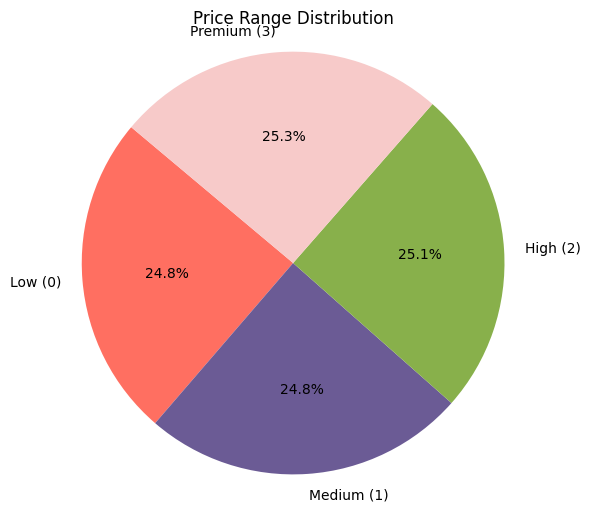

In [ ]:
price_counts = dt['price_range'].value_counts().sort_index()

# Define vibrant colors
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9']  # vibrant red, purple, green, pink

# Define labels (optional, you can customize)
labels = ['Low (0)', 'Medium (1)', 'High (2)', 'Premium (3)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(price_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Price Range Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 2 - Correlation Heatmap

Correlation heatmap to be generated to see how all fields are closely in relation with regards to price range.

From the correlation heatmap below fields are identified which has close relation with price range.

**RAM** - RAM has the highest correlation and has direct impact on price range. Normally it has been seen that higher RAM phones are costly compare to lower which can be seen here

**Battery Power** - Battery power also has high correlation with price range. As the battery capacity increaes the price will increase

**Front Camera** - Camera plays an important role in phone features. Now a days high resolution camera with high megapixel have a higher price. we can see high correlation with price range

**3G/4G** - 3G and 4G technology have a significant difference in data speed. Phone supporting to this technology can lead to higher price range and same can be seen here

**Screen Hight/Screen Width** - Bigger size of screen can have higher manufacturing cost and it requires higher capacity battery capacity also so it has good correlation with price range


In [ ]:
# Correlation Heatmap visualization code
price_range_data = dt[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']].corr()
price_range_data_corr = price_range_data.corr()
price_range_data_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.000734,-0.048503,-0.146887,-0.015244,-0.048129,-0.066705,0.011474,-0.029472,-0.114848,...,-0.049256,-0.074976,0.031821,-0.180332,-0.152509,0.061758,-0.059574,-0.071161,-0.076292,0.181974
blue,-0.000734,1.000000,-0.002380,-0.005852,-0.082656,-0.067679,0.038399,-0.024685,-0.106120,0.012359,...,-0.123965,-0.177613,-0.011834,-0.116235,-0.134111,-0.008093,-0.111126,-0.050908,-0.106902,-0.038005
clock_speed,-0.048503,-0.002380,1.000000,-0.048526,-0.068551,-0.145872,-0.031947,-0.066776,-0.043464,-0.066657,...,-0.083413,-0.079206,-0.062487,-0.108973,-0.083180,-0.077688,-0.151025,0.021305,-0.088440,-0.089672
dual_sim,-0.146887,-0.005852,-0.048526,1.000000,-0.114982,-0.077792,-0.077059,-0.080837,-0.050391,-0.070919,...,-0.112387,-0.061983,0.027051,-0.075914,-0.070623,-0.098950,-0.085202,-0.069891,0.004602,-0.023278
fc,-0.015244,-0.082656,-0.068551,-0.114982,1.000000,-0.123445,-0.144781,-0.056439,0.014585,-0.103189,...,-0.119972,-0.115620,-0.068873,-0.123270,-0.142273,-0.081787,-0.111279,-0.105143,-0.066370,-0.090088
four_g,-0.048129,-0.067679,-0.145872,-0.077792,-0.123445,1.000000,-0.036253,-0.104754,-0.066974,-0.087163,...,-0.150580,-0.102299,-0.077047,-0.021608,-0.011780,-0.182461,0.863373,-0.061794,-0.100572,-0.099756
int_memory,-0.066705,0.038399,-0.031947,-0.077059,-0.144781,-0.036253,1.000000,-0.070276,-0.104807,-0.103679,...,-0.065495,-0.086078,0.018698,0.002078,-0.042442,-0.055544,-0.056234,-0.098048,-0.027603,0.009389
m_dep,0.011474,-0.024685,-0.066776,-0.080837,-0.056439,-0.104754,-0.070276,1.000000,0.018100,-0.054292,...,-0.003322,-0.004122,-0.102098,-0.140886,-0.116452,0.000350,-0.104895,-0.035672,-0.113058,-0.097499
mobile_wt,-0.029472,-0.106120,-0.043464,-0.050391,0.014585,-0.066974,-0.104807,0.018100,1.000000,-0.074986,...,-0.072056,-0.060420,-0.093928,-0.162780,-0.162448,-0.019923,-0.050786,-0.067715,-0.062104,-0.130614
n_cores,-0.114848,0.012359,-0.066657,-0.070919,-0.103189,-0.087163,-0.103679,-0.054292,-0.074986,1.000000,...,-0.058896,-0.027266,-0.104457,-0.053084,-0.025787,-0.022129,-0.078479,0.017692,-0.089848,-0.120862


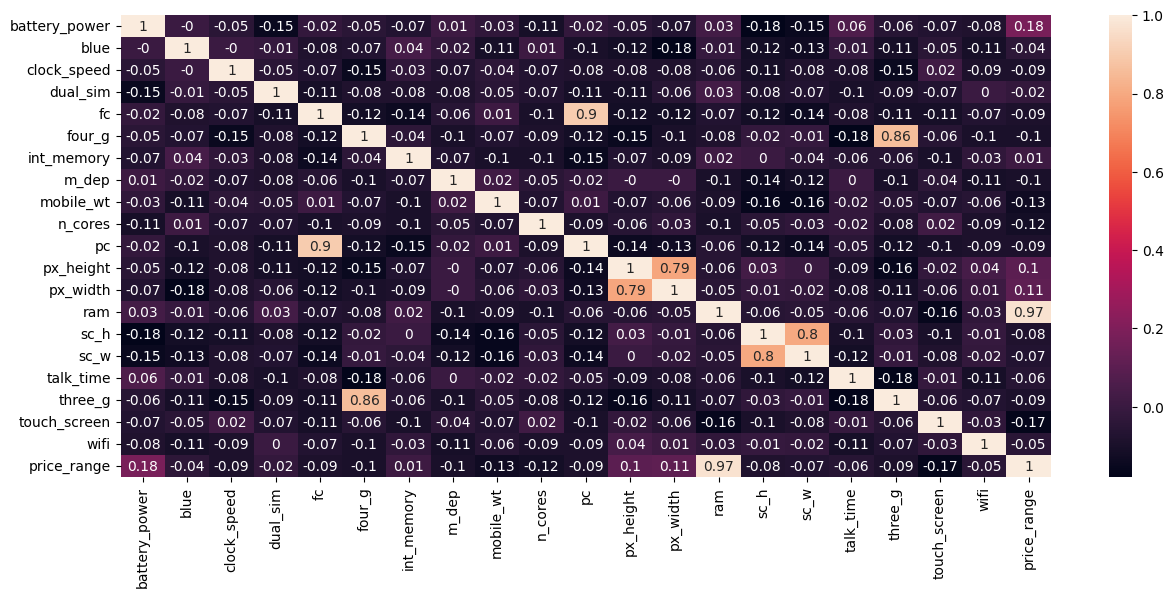

In [ ]:
cor = price_range_data.corr()
plt.figure(figsize=(15,6))
plot=sns.heatmap((cor).round(2), annot=True)

## Chart - 3 - Aanlysis of Categorical Columns - Bluetooth

We would like to see the distribution of categorical variables. We have selected all categorical features who has binary values such as 1-yes and 0-no. We will see whether 1 and 0 are equally distributed or not. In this chart blue tooth features has been considered for analysis thru pie chart. From the pie chart it is seen that distributon is almost equal


In [ ]:
print(dt.blue.value_counts())
print(" ")

blue
1    916
0    903
Name: count, dtype: int64
 


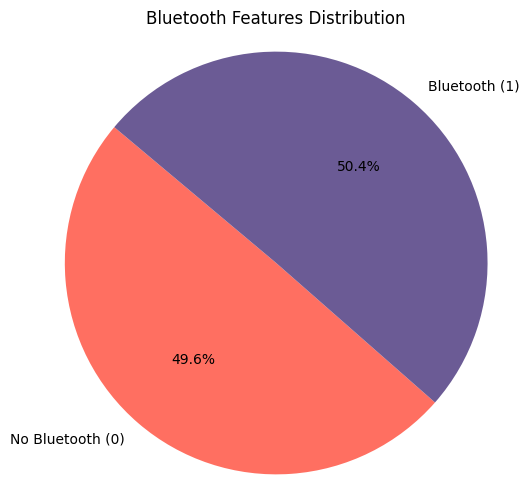

In [ ]:
blue_tooth_counts = dt['blue'].value_counts().sort_index()

# Define vibrant colors
colors = ['#ff6f61', '#6b5b95']  # vibrant red,purple

# Define labels (optional, you can customize)
labels = ['No Bluetooth (0)', 'Bluetooth (1)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(blue_tooth_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Bluetooth Features Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 4 - Aanlysis of Categorical Columns - Deal Sim

We would like to see the distribution of categorical variables. We have selected all categorical features who has binary values such as 1-yes and 0-no. We will see whether 1 and 0 are equally distributed or not. In this chart dual sim features has been considered for analysis thru pie chart.From the pie chart it is seen that distributon is almost equal

In [ ]:
print(dt.dual_sim.value_counts())
print(" ")

dual_sim
1    918
0    901
Name: count, dtype: int64
 


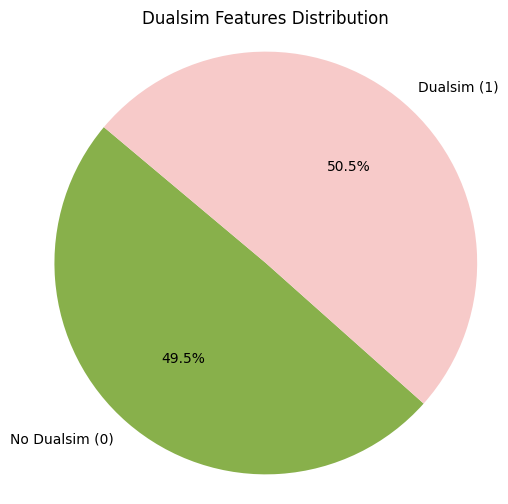

In [ ]:
dual_sim_counts = dt['dual_sim'].value_counts().sort_index()

# Define vibrant colors
colors = ['#88b04b', '#f7cac9']  # vibrant green,pink

# Define labels (optional, you can customize)
labels = ['No Dualsim (0)', 'Dualsim (1)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(dual_sim_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Dualsim Features Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 5 - Aanlysis of Categorical Columns - Four G

We would like to see the distribution of categorical variables. We have selected all categorical features who has binary values such as 1-yes and 0-no. We will see whether 1 and 0 are equally distributed or not. In this chart Four-G features has been considered for analysis thru pie chart. From the pie chart it is seen that distributon is almost equal

In [ ]:
print(dt.four_g.value_counts())
print(" ")

four_g
1    954
0    865
Name: count, dtype: int64
 


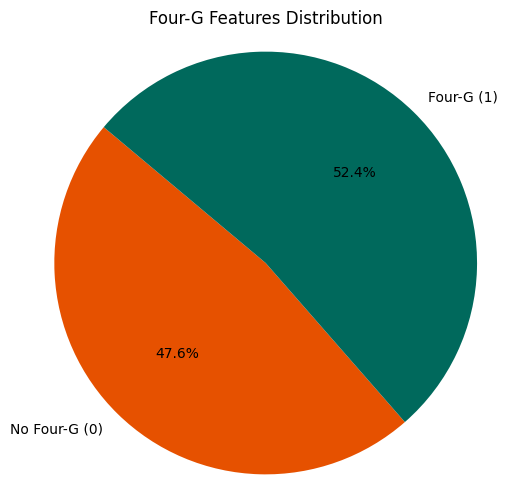

In [ ]:
four_g_counts = dt['four_g'].value_counts().sort_index()

# Define vibrant colors
colors = ['#e65100', '#00695c']  # vibrant green,pink

# Define labels (optional, you can customize)
labels = ['No Four-G (0)', 'Four-G (1)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(four_g_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Four-G Features Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 6 - Aanlysis of Categorical Columns - Three G

We would like to see the distribution of categorical variables. We have selected all categorical features who has binary values such as 1-yes and 0-no. We will see whether 1 and 0 are equally distributed or not. In this chart Three-G features has been considered for analysis thru pie chart. From the pie chart it is seen that not three g features are less compare to three g features.

In [ ]:
print(dt.three_g.value_counts())
print(" ")

three_g
1    1384
0     435
Name: count, dtype: int64
 


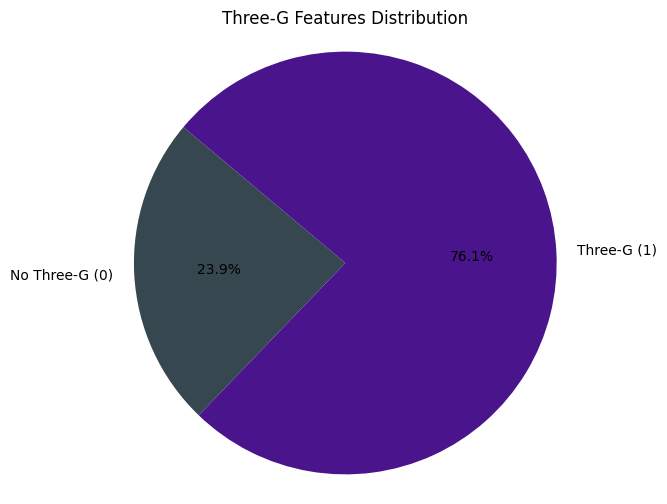

In [ ]:
three_g_counts = dt['three_g'].value_counts().sort_index()

# Define vibrant colors
colors = ['#37474f', '#4a148c']  # vibrant green,pink

# Define labels (optional, you can customize)
labels = ['No Three-G (0)', 'Three-G (1)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(three_g_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Three-G Features Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 7 - Aanlysis of Categorical Columns - WiFi

We would like to see the distribution of categorical variables. We have selected all categorical features who has binary values such as 1-yes and 0-no. We will see whether 1 and 0 are equally distributed or not. In this chart WiFi features has been considered for analysis thru pie chart. From the pie chart it is seen that WiFi features is equally distributed

In [ ]:
print(dt.wifi.value_counts())
print(" ")

wifi
1    934
0    885
Name: count, dtype: int64
 


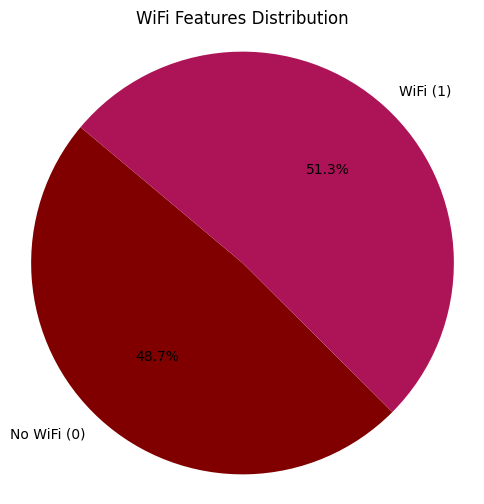

In [ ]:
wifi_counts = dt['wifi'].value_counts().sort_index()

# Define vibrant colors
colors = ['#800000', '#ad1457']  # vibrant green,pink

# Define labels (optional, you can customize)
labels = ['No WiFi (0)', 'WiFi (1)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(wifi_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('WiFi Features Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 8 - Aanlysis of Categorical Columns - Touch Screen

We would like to see the distribution of categorical variables. We have selected all categorical features who has binary values such as 1-yes and 0-no. We will see whether 1 and 0 are equally distributed or not. In this chart Touch Screen features has been considered for analysis thru pie chart. From the pie chart it is seen that Touch Screen features is equally distributed

In [ ]:
print(dt.touch_screen.value_counts())
print(" ")

touch_screen
1    923
0    896
Name: count, dtype: int64
 


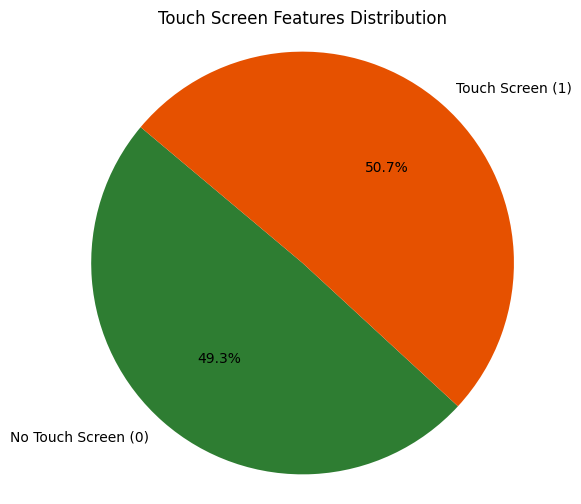

In [ ]:
touch_screen_counts = dt['touch_screen'].value_counts().sort_index()

# Define vibrant colors
colors = ['#2e7d32', '#e65100']  # vibrant green,pink

# Define labels (optional, you can customize)
labels = ['No Touch Screen (0)', 'Touch Screen (1)']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(touch_screen_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Touch Screen Features Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Chart - 9 - Aanlysis of Non Categorical Columns - RAM Vs Price Range

We would like to know whether the price range is getting higher as the RAM increase. Calculated the average RAM for every price group and ploted the bar graph of price range vs RAM. Also performed analysis thru box plot. From both the graph it is visible that as the RAM increase the price range is also increases drastically.

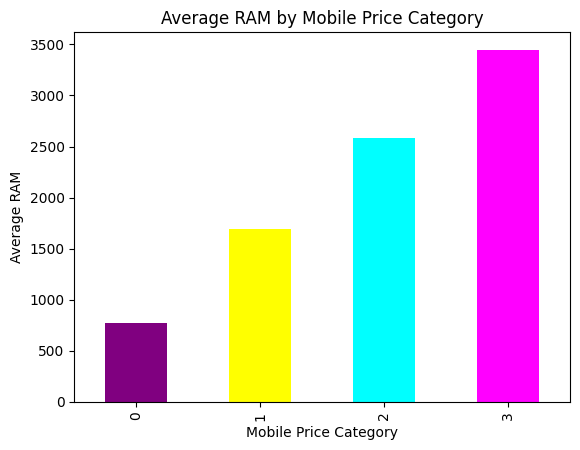

In [ ]:
mean_ram = dt.groupby('price_range')['ram'].mean()
colors = ['purple', 'yellow', 'cyan', 'magenta']
mean_ram.plot(kind='bar',color=colors)
plt.title('Average RAM by Mobile Price Category')
plt.xlabel('Mobile Price Category')
plt.ylabel('Average RAM')
plt.show()

<ipython-input-40-699b00d601ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=dt, palette=palette)


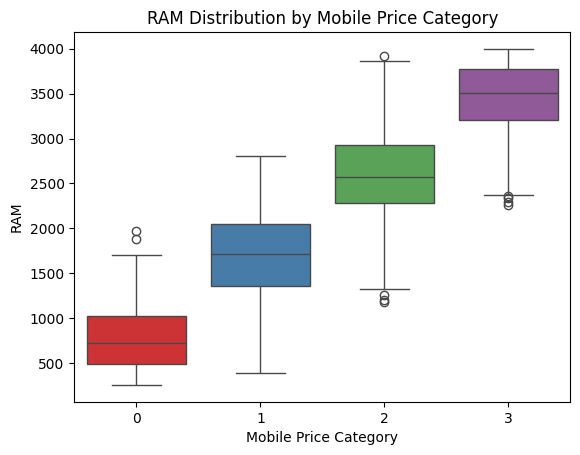

In [ ]:
palette = sns.color_palette("Set1", n_colors=4)
sns.boxplot(x='price_range', y='ram', data=dt, palette=palette)

# Add labels and title
plt.xlabel("Mobile Price Category")
plt.ylabel("RAM")
plt.title("RAM Distribution by Mobile Price Category")

plt.show()

## Chart - 10 - Aanlysis of Non Categorical Columns - Battery Power Vs Price Range

We would like to know whether the price range is getting higher as the batter power increase. Calculated the average batter power for every price group and ploted the bar graph of price range vs batter power. Also performed analysis thru box plot. From both the graph it is visible that as the battery power increase the price range is also increases.

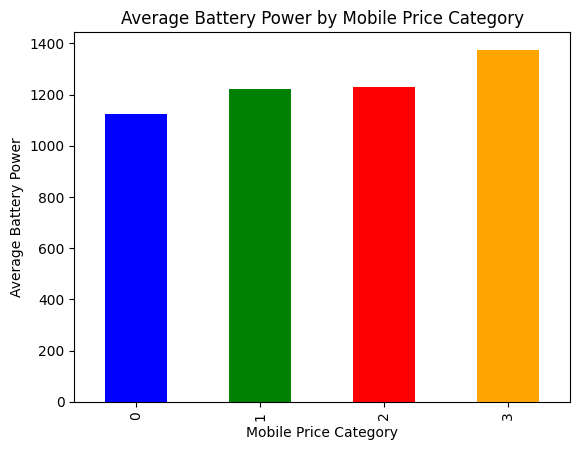

In [ ]:
mean_battery = dt.groupby('price_range')['battery_power'].mean()
colors = ['blue', 'green', 'red', 'orange']
mean_battery.plot(kind='bar',color=colors)
plt.title('Average Battery Power by Mobile Price Category')
plt.xlabel('Mobile Price Category')
plt.ylabel('Average Battery Power')
plt.show()

<ipython-input-42-67998c5f7ded>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='battery_power', data=dt, palette=palette)


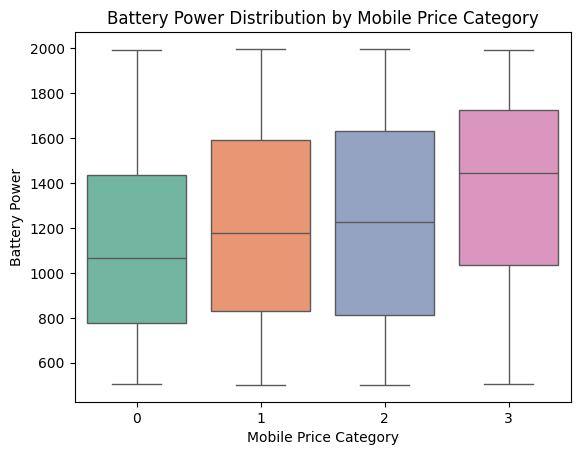

In [ ]:
palette = sns.color_palette("Set2", n_colors=4)
sns.boxplot(x='price_range', y='battery_power', data=dt, palette=palette)

# Add labels and title
plt.xlabel("Mobile Price Category")
plt.ylabel("Battery Power")
plt.title("Battery Power Distribution by Mobile Price Category")

plt.show()

## Chart - 11 - Aanlysis of Non Categorical Columns - Pixel Height Vs Price Range

We would like to know whether the price range is getting higher as the batter power increase. Calculated the average batter power for every price group and ploted the bar graph of price range vs pixel height. Also performed analysis thru box plot. From both the graph it is visible that as the pixel height increase the price range is also increases in most cases.

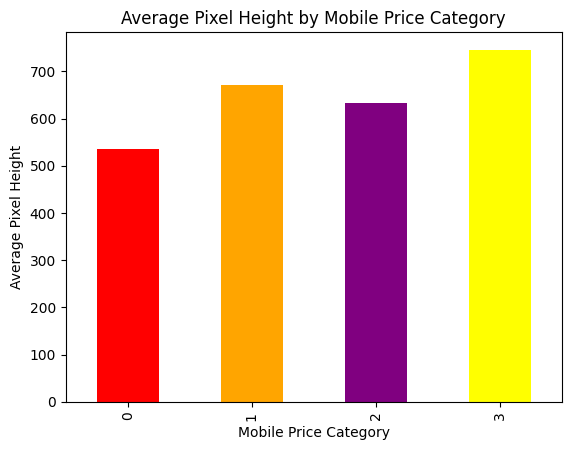

In [ ]:
mean_pixel_height = dt.groupby('price_range')['px_height'].mean()
colors = ['red', 'orange', 'purple', 'yellow']
mean_pixel_height.plot(kind='bar',color=colors)
plt.title('Average Pixel Height by Mobile Price Category')
plt.xlabel('Mobile Price Category')
plt.ylabel('Average Pixel Height')
plt.show()

<ipython-input-44-86f83f7b6025>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='px_height', data=dt, palette=palette)


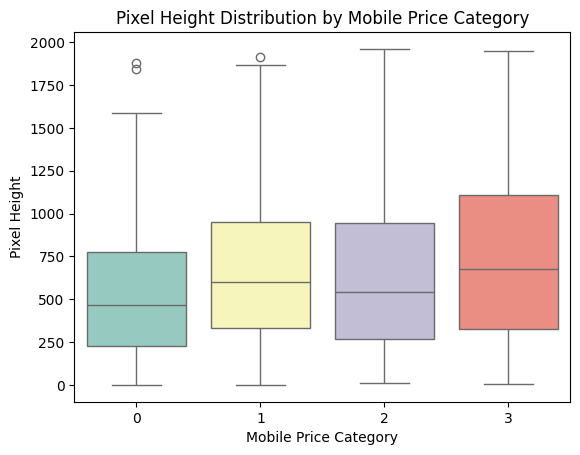

In [ ]:
palette = sns.color_palette("Set3", n_colors=4)
sns.boxplot(x='price_range', y='px_height', data=dt, palette=palette)

# Add labels and title
plt.xlabel("Mobile Price Category")
plt.ylabel("Pixel Height")
plt.title("Pixel Height Distribution by Mobile Price Category")

plt.show()

## Chart - 12 - Aanlysis of Non Categorical Columns - Pixel Wodth Vs Price Range

We would like to know whether the price range is getting higher as the batter power increase. Calculated the average batter power for every price group and ploted the bar graph of price range vs pixel width. Also performed analysis thru box plot. From both the graph it is visible that as the pixel width increase the price range is also increases in most cases.

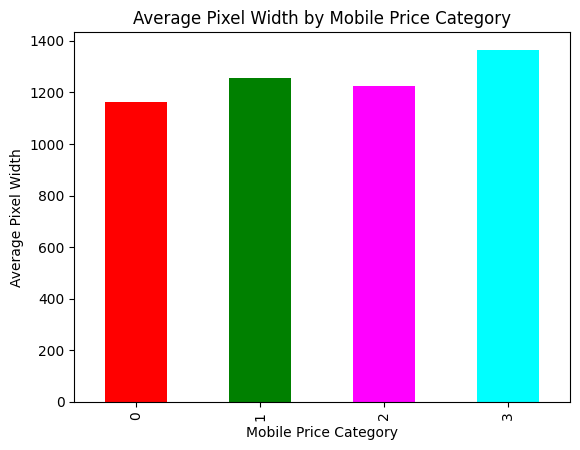

In [ ]:
mean_pixel_width = dt.groupby('price_range')['px_width'].mean()
colors = ['red', 'green', 'magenta', 'cyan']
mean_pixel_width.plot(kind='bar',color=colors)
plt.title('Average Pixel Width by Mobile Price Category')
plt.xlabel('Mobile Price Category')
plt.ylabel('Average Pixel Width')
plt.show()

<ipython-input-46-e75b5c448562>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='px_width', data=dt, palette=palette)


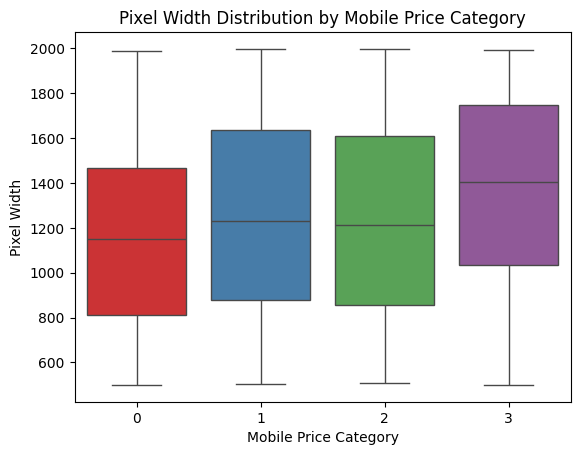

In [ ]:
palette = sns.color_palette("Set1", n_colors=4)
sns.boxplot(x='price_range', y='px_width', data=dt, palette=palette)

# Add labels and title
plt.xlabel("Mobile Price Category")
plt.ylabel("Pixel Width")
plt.title("Pixel Width Distribution by Mobile Price Category")

plt.show()

## Chart - 13 - Combined Aanlysis of all Categorical Columns - Bluetooth, Dualsim, 3G, 4G, Touchscreen

We wanted to see how all categorical features can have impact on price range. We have selected blue tooth, dual sim, 3G, 4G and touch screen features, calculated its mean price by grouping price range categories and plotted them on graph.

From the graph it can be seen that blue tooth and dual sim featues have relation with price range while others are not.

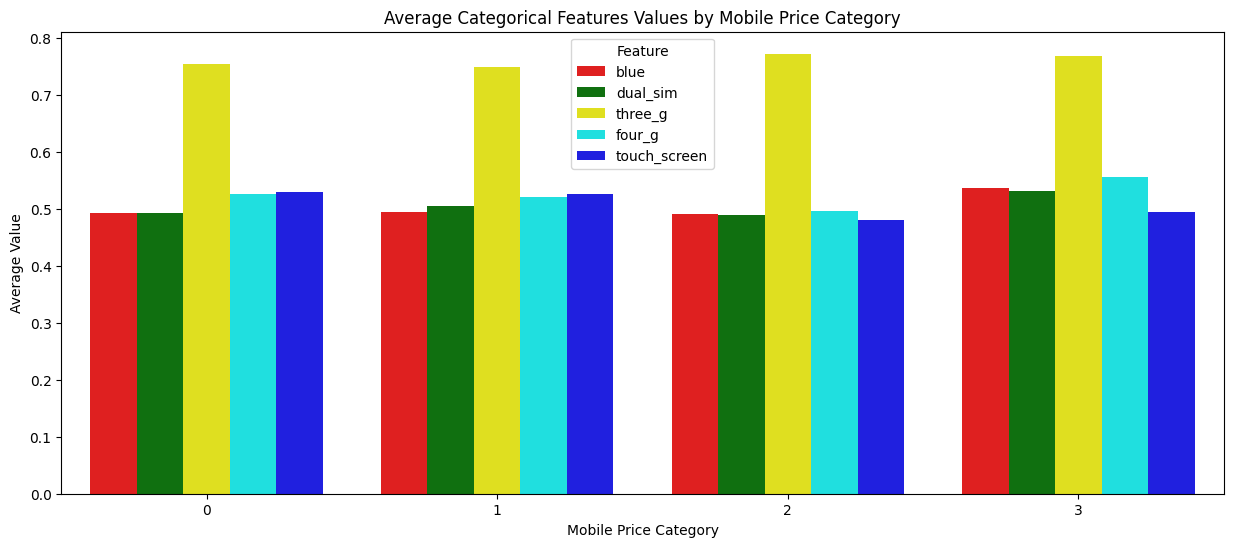

In [ ]:
mean_values = dt[['price_range', 'blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen']].groupby('price_range').mean()

# Reset index to turn 'price_range' into a column
mean_values = mean_values.reset_index()

# Melt the dataframe to long format
melted = mean_values.melt(id_vars='price_range', var_name='Feature', value_name='Average')

# Set the plot size
plt.figure(figsize=(15, 6))

# Create the seaborn barplot
sns.barplot(data=melted, x='price_range', y='Average', hue='Feature', palette=['red', 'green', 'yellow', 'cyan', 'blue'])

# Add labels and title
plt.title('Average Categorical Features Values by Mobile Price Category')
plt.xlabel('Mobile Price Category')
plt.ylabel('Average Value')

# Show the plot
plt.show()

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have not seen any missing values in the dataset

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Identified the list of features for which wanted to check outliers. Those features are ram, batter_power, clock_speed, int_memory, m_dep, mobile_wt, n_cores, px_height, px_weight, sc_h, sc_w, talk_time.

Box plot is generated for all features to see any outliers and it has been observed that there is no outliers.

In [ ]:
fig=px.box(dt,y='ram')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of RAM',
    yaxis_title='RAM'
)
fig.show()

In [ ]:
fig=px.box(dt,y='battery_power')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Battery Power',
    yaxis_title='Battery Power'
)
fig.show()

In [ ]:
fig=px.box(dt,y='clock_speed')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Clock Speed',
    yaxis_title='Clock Speed'
)
fig.show()

In [ ]:
fig=px.box(dt,y='int_memory')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Internal Memory',
    yaxis_title='Internal Memory'
)
fig.show()

There is no outliers seen

In [ ]:
fig=px.box(dt,y='m_dep')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Mobile Depth',
    yaxis_title='Mobile Depth'
)
fig.show()

In [ ]:
fig=px.box(dt,y='mobile_wt')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Mobile Weight',
    yaxis_title='Mobile Weight'
)
fig.show()

In [ ]:
fig=px.box(dt,y='n_cores')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Number of Cores',
    yaxis_title='Number of Cores'
)
fig.show()

In [ ]:
fig=px.box(dt,y='px_height')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Pixel Height',
    yaxis_title='Pixel Height'
)
fig.show()

In [ ]:
fig=px.box(dt,y='px_width')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Pixel Width',
    yaxis_title='Pixel Width'
)
fig.show()

In [ ]:
fig=px.box(dt,y='sc_h')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Screen Height',
    yaxis_title='Screen Height'
)
fig.show()

In [ ]:
fig=px.box(dt,y='sc_w')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Screen Width',
    yaxis_title='Screen Width'
)
fig.show()

In [ ]:
fig=px.box(dt,y='talk_time')
fig.update_layout(
    height=500,
    width=600,
    title='Box Plot of Talk Time',
    yaxis_title='Talk Time'
)
fig.show()

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = dt.drop('price_range',axis = 1)
y = dt['price_range']

In [ ]:
dt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler

In [ ]:
scal = StandardScaler()
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

##### What data splitting ratio have you used and why?

Here we have used 80:20 ratio as train:test as our dataset voolume is not much high, there is no outliers, and no of features are also very less

## ***7. ML Model Implementation***

### **ML Model 1 - Decision Tree Classifier**

#### Import Dependency

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


#### Fit the Algorithm

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

#### Predict the Model

In [ ]:
pred = dtc.predict(x_test)
pred

array([1, 0, 1, 0, 2, 0, 1, 2, 2, 3, 1, 0, 0, 1, 2, 3, 2, 0, 1, 2, 1, 0,
       1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 1, 1, 2, 2, 1, 1,
       2, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0, 3, 2, 0, 1, 2, 0, 2, 0, 3, 1,
       3, 1, 3, 3, 2, 2, 3, 0, 0, 2, 3, 1, 3, 0, 2, 1, 2, 3, 3, 1, 0, 3,
       1, 3, 0, 2, 2, 3, 3, 0, 1, 3, 3, 0, 2, 1, 2, 0, 3, 3, 1, 0, 3, 0,
       3, 0, 0, 0, 3, 3, 2, 0, 1, 2, 2, 1, 2, 0, 1, 3, 2, 3, 0, 3, 2, 3,
       0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 3, 0, 2, 2, 0, 3, 3, 2, 2, 2, 3, 1,
       2, 3, 0, 2, 1, 0, 1, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 2, 2, 3, 0, 1,
       0, 3, 2, 1, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 3, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 2, 1, 3, 3, 1, 2, 0, 2, 2, 1, 0, 3, 2, 1, 3, 2,
       0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 3, 2, 3, 0, 0, 3, 0, 1,
       0, 2, 1, 0, 2, 2, 3, 3, 0, 1, 0, 0, 3, 2, 1, 3, 2, 1, 0, 3, 1, 1,
       1, 0, 0, 0, 1, 0, 3, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       3, 0, 1, 0, 1, 2, 0, 2, 3, 1, 3, 3, 3, 3, 2,

#### Check the Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
dtc_acc = accuracy_score(pred,y_test)
print('Accuracy Score Using Decision Tree Classifier ->',dtc_acc)
print('Confusion Matrix Using Decision Tree Classifier ->\n',confusion_matrix(pred,y_test))

Accuracy Score Using Decision Tree Classifier -> 0.8296703296703297
Confusion Matrix Using Decision Tree Classifier ->
 [[71  7  0  0]
 [ 9 78 12  0]
 [ 0 11 71  8]
 [ 0  0 15 82]]


### **ML Model 2 - Support Vector Classifier**

#### Fit the Algorithm

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

#### Predict the Model

In [ ]:
pred = svc.predict(x_test)
pred

array([1, 0, 1, 0, 3, 0, 1, 2, 2, 3, 2, 0, 0, 1, 2, 3, 1, 1, 0, 3, 1, 0,
       2, 3, 1, 3, 1, 3, 2, 0, 0, 3, 0, 2, 0, 0, 3, 3, 0, 1, 2, 1, 1, 0,
       2, 3, 1, 2, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 2, 1, 0, 2, 0, 3, 1,
       2, 1, 2, 3, 2, 2, 3, 0, 0, 2, 3, 1, 3, 0, 2, 1, 1, 3, 3, 0, 0, 3,
       1, 2, 0, 1, 2, 3, 3, 0, 1, 3, 2, 0, 2, 1, 2, 0, 3, 3, 1, 0, 2, 0,
       3, 0, 1, 0, 3, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 3, 0, 2, 2, 3,
       0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 2, 0, 2, 3, 1, 3, 3, 1, 2, 1, 3, 1,
       2, 3, 0, 2, 1, 0, 1, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 2, 2, 3, 1, 0,
       0, 3, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 1, 2, 2, 1, 3, 2, 1, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 1,
       0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 0, 0, 3, 0, 1,
       0, 3, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 2, 2, 1, 3, 2, 1, 0, 3, 1, 1,
       1, 0, 0, 0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 3, 1, 2, 1, 1, 1, 2, 2, 2,
       3, 0, 1, 0, 0, 3, 1, 2, 3, 1, 3, 3, 2, 3, 2,

#### Check the Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
svc_acc = accuracy_score(pred,y_test)
print('Accuracy Score Using Support Vector Classifier ->',svc_acc)
print('Confusion Matrix Using Support Vector Classifier ->\n',confusion_matrix(pred,y_test))

Accuracy Score Using Support Vector Classifier -> 0.8873626373626373
Confusion Matrix Using Support Vector Classifier ->
 [[75  5  0  0]
 [ 5 84 10  0]
 [ 0  7 81  7]
 [ 0  0  7 83]]


### **ML Model 3 - Logistics Regression**

#### Fit the Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

#### Predict the Model

In [ ]:
pred = lr.predict(x_test)
pred

array([2, 0, 1, 0, 2, 0, 1, 2, 2, 3, 1, 0, 0, 1, 2, 3, 2, 0, 0, 2, 1, 0,
       2, 3, 1, 3, 1, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 1, 1, 2, 1, 1, 0,
       2, 3, 1, 2, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 2, 2, 0, 2, 0, 3, 1,
       3, 1, 3, 3, 2, 2, 3, 0, 0, 2, 3, 1, 3, 0, 2, 1, 1, 3, 3, 1, 0, 3,
       1, 2, 0, 1, 2, 2, 3, 0, 1, 3, 2, 0, 2, 1, 2, 0, 3, 3, 1, 0, 2, 0,
       3, 0, 1, 0, 3, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 3, 0, 2, 2, 3,
       0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 1, 2, 1, 3, 1,
       3, 3, 0, 2, 1, 0, 1, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 2, 2, 3, 0, 0,
       0, 3, 1, 2, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 2, 1, 3, 2, 1, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2,
       0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 3, 2, 3, 0, 0, 2, 0, 1,
       0, 2, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 2, 2, 1, 3, 2, 1, 0, 3, 0, 1,
       1, 0, 0, 0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 3, 1, 2, 1, 1, 1, 1, 2, 1,
       3, 0, 1, 0, 0, 3, 0, 2, 3, 1, 3, 3, 2, 3, 2,

#### Check the Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(pred,y_test)
print('Accuracy Score Using Logistics Regression ->',lr_acc)
print('Confusion Matrix Using Logistics Regression ->\n',confusion_matrix(pred,y_test))

Accuracy Score Using Logistics Regression -> 0.9615384615384616
Confusion Matrix Using Logistics Regression ->
 [[79  2  0  0]
 [ 1 92  4  0]
 [ 0  2 90  1]
 [ 0  0  4 89]]


### **ML Model 4 - RANDOM Forest**

#### Fit the Algorithm

In [ ]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

#### Predict the Model

In [ ]:
pred = rfc.predict(x_test)
pred

array([1, 0, 2, 0, 3, 0, 1, 2, 2, 3, 1, 0, 0, 1, 2, 3, 2, 0, 0, 2, 1, 0,
       2, 3, 1, 3, 1, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 1, 1, 2, 1, 1, 1,
       2, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0, 3, 3, 0, 2, 2, 0, 2, 0, 3, 1,
       3, 1, 3, 3, 2, 2, 3, 0, 0, 2, 2, 1, 3, 0, 2, 1, 2, 3, 3, 0, 0, 3,
       1, 2, 0, 1, 2, 3, 3, 0, 1, 3, 2, 0, 2, 1, 2, 0, 3, 3, 1, 0, 3, 0,
       3, 0, 0, 0, 3, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 3, 0, 2, 2, 3,
       0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 2, 0, 1, 2, 0, 3, 3, 1, 2, 2, 3, 1,
       2, 3, 0, 2, 1, 0, 1, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 2, 2, 3, 1, 1,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       3, 2, 1, 3, 2, 2, 2, 1, 3, 3, 1, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2,
       0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 0, 0, 3, 0, 1,
       0, 2, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 2, 2, 1, 3, 2, 1, 0, 3, 1, 1,
       1, 0, 0, 0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 0, 0, 3, 0, 2, 3, 1, 3, 2, 3, 3, 2,

#### Check the Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(pred,y_test)
print('Accuracy Score Using RANDOM Forest ->',rfc_acc)
print('Confusion Matrix Using RANDOM Forest ->\n',confusion_matrix(pred,y_test))

Accuracy Score Using RANDOM Forest -> 0.8763736263736264
Confusion Matrix Using RANDOM Forest ->
 [[75  8  0  0]
 [ 5 80  6  0]
 [ 0  8 83  9]
 [ 0  0  9 81]]


### **ML Model 5 - XG Boost**

#### Fit the Algorithm

In [ ]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[15:03:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "parameters" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Predict the Model

In [ ]:
pred = xgb.predict(x_test)
pred

array([2, 0, 1, 0, 2, 0, 1, 2, 2, 3, 1, 0, 0, 1, 2, 3, 2, 0, 1, 2, 1, 0,
       2, 3, 1, 3, 1, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 1, 2, 1, 1, 1,
       2, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0, 3, 3, 0, 2, 2, 0, 2, 0, 3, 1,
       3, 1, 2, 3, 2, 2, 3, 0, 0, 2, 2, 1, 3, 0, 2, 1, 2, 3, 3, 1, 0, 3,
       1, 3, 0, 1, 2, 3, 3, 0, 1, 3, 2, 0, 2, 1, 2, 0, 3, 3, 1, 0, 3, 0,
       3, 0, 0, 0, 3, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 3, 0, 2, 2, 3,
       0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 2, 1, 3, 1,
       2, 3, 0, 2, 1, 0, 1, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 2, 2, 3, 0, 0,
       0, 3, 1, 2, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 1, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2,
       0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 3, 2, 3, 0, 0, 3, 1, 1,
       0, 2, 1, 1, 2, 2, 3, 3, 0, 1, 0, 0, 3, 2, 1, 3, 2, 1, 0, 3, 1, 1,
       1, 0, 0, 0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 3, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 0, 1, 2, 0, 2, 3, 1, 3, 2, 2, 3, 2,

#### Check the Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
xgb_acc = accuracy_score(pred,y_test)
print('Accuracy Score Using XG Boost ->',xgb_acc)
print('Confusion Matrix Using XG Boost ->\n',confusion_matrix(pred,y_test))

Accuracy Score Using XG Boost -> 0.8901098901098901
Confusion Matrix Using XG Boost ->
 [[74  7  0  0]
 [ 6 83  5  0]
 [ 0  6 85  8]
 [ 0  0  8 82]]


### **Plotting All Model Accuracy Score**

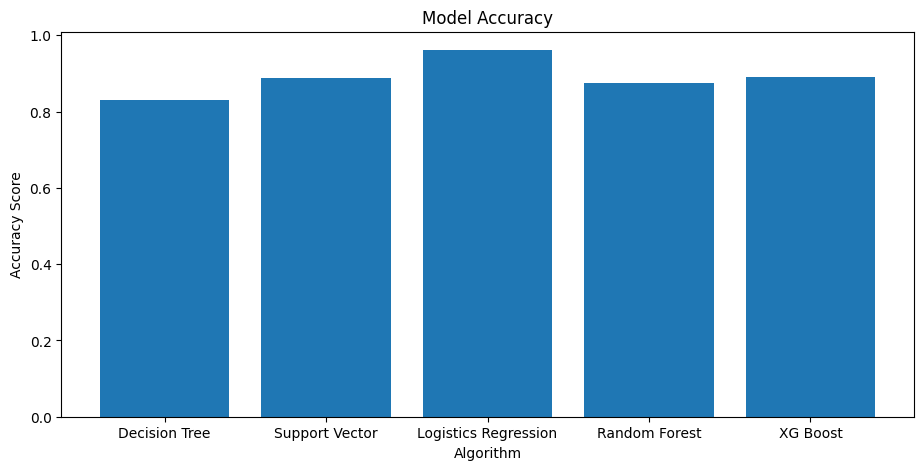

In [ ]:
fig=plt.figure(figsize=(11,5))
plt.bar(x=['Decision Tree','Support Vector','Logistics Regression','Random Forest','XG Boost'],height=[dtc_acc,svc_acc,lr_acc,rfc_acc,xgb_acc])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Here we have used most of the machine learning algorithm being used for classification types of model prediction.

1. Decision tree - 82.96
2. Support vector - 88.73
3. Logistics regression - 96.15
4. Random forest - 87.63
5.  XG Boost - 89.01

From these algorithm and its accuracy score its seen that Logistics Regresison algorithm has the best accuracy score among all and that model is the best fit.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***